gmd1_t length: 827
mso_area_t length: 827
 
0.2001 x + 1.684e+09


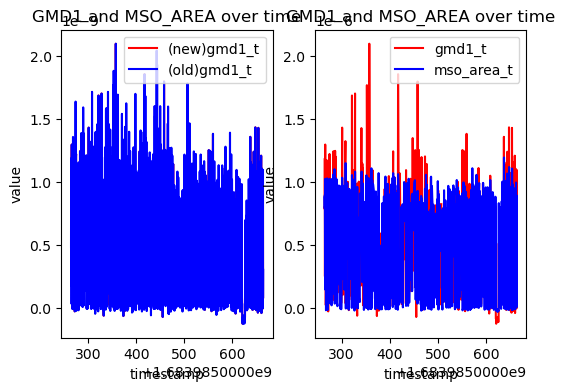

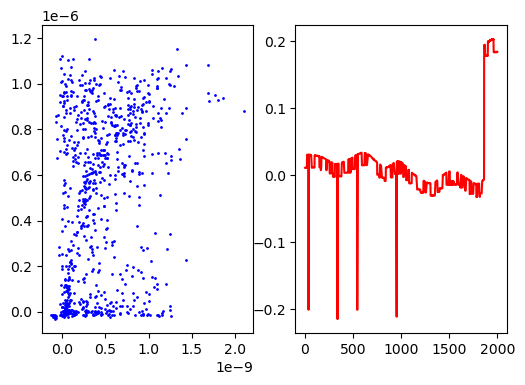

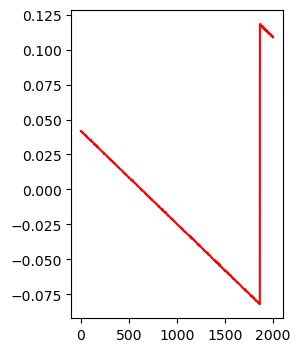

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
"""
以PD的数据随timestamp的趋势走向，判断GMD的数据走向，只要两者变化趋势一致的数据
"""
# 读取CSV文件
df = pd.read_csv('2023-05-13-run12.csv')

# # 使用差分来找出mso_area_t变化的方向
# diff = np.diff(df['mso_area_t'])
# direction = np.sign(diff)

# 使用差分来找出mso_area_t变化的方向
diff_mso = np.diff(df['mso_area_t'])
direction = np.sign(diff_mso)

# 使用差分来找出gmd1_t变化的方向
diff_gmd1 = np.diff(df['gmd1_t'])
gmd1_direction = np.sign(diff_gmd1)

# 找出gmd1_t与mso_area_t变化趋势一致的数据点
# mask = np.concatenate(([False], gmd1_direction == direction))
mask = gmd1_direction == direction
linear_df = df.iloc[:-1][mask]

# # 找出gmd1_t与mso_area_t变化趋势一致的数据点
# mask = np.concatenate(([False], np.diff(direction) != 0))
# linear_df = df.iloc[:-1][mask]


# 绘制符合要求的gmd1_t数据点
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 2, 1)
# 绘制mso_area_t随timestamp的曲线图
# ax.plot(df['mso_timestamp_t'], df['mso_area_t'], label='(old)mso_area_t',c ='red')
# ax.plot(linear_df['mso_timestamp_t'], linear_df['mso_area_t'], label='(new)mso_area_t',c='blue')
ax.plot(linear_df['gmd1_timestamp_t'], linear_df['gmd1_t'], label='(new)gmd1_t',c='red')
ax.plot(df['gmd1_timestamp_t'], df['gmd1_t'], label='(old)gmd1_t',c='blue')

# 添加标签
ax.set_xlabel('timestamp')
ax.set_ylabel('value')
ax.set_title('GMD1 and MSO_AREA over time')
ax.legend()



ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(linear_df['gmd1_timestamp_t'], linear_df['gmd1_t']*1000, label='gmd1_t',c='red')
ax2.plot(linear_df['mso_timestamp_t'], linear_df['mso_area_t'], label='mso_area_t',c='blue')

# 添加标签
ax2.set_xlabel('timestamp')
ax2.set_ylabel('value')
ax2.set_title('GMD1 and MSO_AREA over time')
ax2.legend()

print('gmd1_t length:',len(linear_df['gmd1_t']))
print('mso_area_t length:',len(linear_df['mso_area_t']))

# # 获取linear_df['gmd1_timestamp_t']的索引值
indexes = linear_df['gmd1_t'].index
# # 打印索引值
# print(gmd1_t_indexes)



fig2 = plt.figure(figsize=(6, 4))
ax3 = fig2.add_subplot(1, 2, 1)
# ax3.scatter(linear_df['gmd1_t'], linear_df['mso_area_t'], label='gmd1_t vs mso_area_t',c='red',s=1)
ax3.scatter(linear_df['gmd1_t'][:-1], linear_df['mso_area_t'][1:], label='gmd1_t vs mso_area_t',c='blue',s=1)
# 显示图形
ax4= fig2.add_subplot(1, 2, 2)
ax4.plot(indexes,linear_df['mso_timestamp_t']-linear_df['gmd1_timestamp_t'], label='gmd1_t vs mso_area_t',c='red')

x = indexes
y = linear_df['mso_timestamp_t']
coefficients = np.polyfit(x, y, 1)
polyfit_fn = np.poly1d(coefficients)
print(polyfit_fn)
# 非线性部分
fig3= plt.figure(figsize=(6, 4))
ax5= fig3.add_subplot(1, 2, 1)
ax5.plot(indexes,linear_df['mso_timestamp_t']-polyfit_fn(indexes), label='gmd1_t vs mso_area_t',c='red')

plt.show()
